In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Mean Shift (Hierarchical Clustering)

In this algorithm the number of clusters is not defined, the algorithm finds out the number of clusters by itself.

1. At the beginning of the algorithm, each datapoint is a centroid and have a radius. 

2. Then, the mean of the points inside that radius become the new centroid. 

3. Steps 1 and 2 are performed for each datapoint until convergence.

[[ 2.99690498 10.0316023   9.95432567]
 [ 4.93048843  5.10547937  4.90090964]
 [ 0.96630486  1.02925241  1.11735159]]
Number of estimated clusters:  3


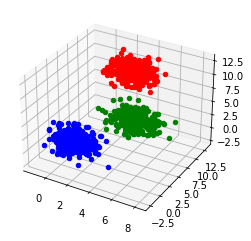

In [254]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 1000, centers = centers)
def min_max_scaler(df):
    for column in df.keys():
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            max_val = df[column].max()
            min_val = df[column].min()
            df[column] = df[column].apply(lambda x: (x-min_val)/ (max_val-min_val))


# df = pd.read_csv('income.csv')
# min_max_scaler(df)
# X = np.array(df.drop(['Name'],1))

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters = len(np.unique(labels))
print('Number of estimated clusters: ', n_clusters)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

colors = ['r','g','b','c']

for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2], c = colors[labels[i]], marker = 'o')
    
plt.show();


__Mean Shift from scratch__

3.341624966203106


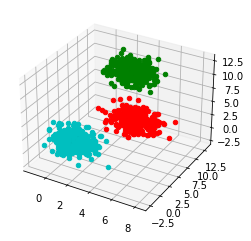

In [263]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import estimate_bandwidth
            
class Mean_Shift:
    def __init__(self, bandwidth=None, max_iter = 300):
        self.bandwidth = bandwidth
        self.max_iter = max_iter 
    
    def fit(self, data):
        if self.bandwidth == None:
            self.bandwidth = estimate_bandwidth(data)
            print(self.bandwidth)
            
        self.centroids = []
        n_iter = 0
        max_diff = 1
        
        for i in range(len(data)):
            self.centroids.append(tuple(data[i]))            
        
        
        while n_iter < self.max_iter and max_diff != 0:
            old_centroids = list(self.centroids)
            diff = []
            
            for centroid in self.centroids:
                i = self.centroids.index(centroid)
                in_bandwidth = []

                for featureset in data:
                    if (np.linalg.norm(featureset-centroid)) <= self.bandwidth:
                        in_bandwidth.append(featureset)
                
                self.centroids[i] = tuple(np.average(in_bandwidth,0))
                temp = max((abs(np.array(self.centroids[i]) - np.array(old_centroids[i])))/np.array(old_centroids[i]))
                diff.append(temp)
            
            max_diff = max(diff)
            self.centroids = list(set(self.centroids)) # Initially the number of centroids is equal 
                                                       # to the number of points. But after some steps they
                                                       # will converge to the same point. 
                                                       # We just need unique centroid values.       
            n_iter += 1
            
        to_pop = []
        
        for i in self.centroids:
            for ii in self.centroids:
                if i != ii and (np.linalg.norm(np.array(i)-np.array(ii))) <= self.bandwidth:
                    if i not in to_pop and ii not in to_pop:
                        to_pop.append(i)
                        
    
        for i in to_pop:
            self.centroids.remove(i)
            
        self.classifications = {}
        self.centroids = np.array(self.centroids)
    
        for i in range(len(self.centroids)):
            self.classifications[i] = []
        
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-centroid) for centroid in self.centroids]
            classification = (distances.index(min(distances)))
            self.classifications[classification].append(featureset)

        
    
    def predict(self,data):
        distances = [np.linalg.norm(data - centroid) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    
    def visualization(self,data):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        color_set = ['r','g','c','b','y']
        for cluster in self.classifications:
            for featureset in self.classifications[cluster]:
                ax.scatter(featureset[0],featureset[1],featureset[2], color = color_set[cluster])
        
        for centroid in self.centroids:
                ax.scatter(centroid[0], centroid[1],centroid[2], marker = 'X', c='k', s=100)
        
ms = Mean_Shift()
ms.fit(X)
#print(ms.centroids,'\n')
ms.visualization(X)